In [35]:
from rdkit import Chem
import pandas as pd
from rdkit.Chem import Lipinski
from rdkit.Chem import Descriptors

In [8]:
data = pd.read_csv('cannabinoid_receptor_data.csv', delimiter=';')

In [9]:
data

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL294472,NaN,0,384.56,1,6.43,4,CCCCCCC(C)(C)c1cc(O)c2c(c1)OC(C)(C)[C@H]1CC=C(...,Ki,'=',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1129188,1,Scientific Literature,Bioorg. Med. Chem. Lett.,1996.0,None,NaN
1,CHEMBL3596747,NaN,0,343.42,0,3.46,13a,CCOC(=O)CNC(=O)CCCCCOc1ccc2ccccc2c1,Ki,'>',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3596121,1,Scientific Literature,MedChemComm,2014.0,CHEMBL3307715,NaN
2,CHEMBL3596749,NaN,0,297.40,0,4.06,12b,O=C(CCCCCOc1cccc2ccccc12)NC1CC1,Ki,'>',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3596121,1,Scientific Literature,MedChemComm,2014.0,CHEMBL3307715,NaN
3,CHEMBL3596757,NaN,0,294.35,0,2.28,18d,CCNC(=O)NCCCCCOc1ccc2c(c1)OCO2,Ki,'>',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3596121,1,Scientific Literature,MedChemComm,2014.0,CHEMBL3307715,NaN
4,CHEMBL239703,NaN,0,551.84,0,4.32,rac-26,O=C(NN1CCOCC1)C1=NN(c2ccc(Cl)cc2Cl)C(c2ccc(Cl)...,Ki,'=',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1138302,1,Scientific Literature,J. Med. Chem.,2007.0,CHEMBL3307715,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,CHEMBL4456796,NaN,0,357.41,0,4.89,1-4f,O=C(O)CCCn1cc(C(=O)c2cccc3ccccc23)c2ccccc21,Ki,'>',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4431329,1,Scientific Literature,J Med Chem,2016.0,None,NaN
5988,CHEMBL4475213,NaN,0,384.48,1,5.31,1-7c,CCCCCn1cc(C(=O)c2ccc(C(N)=O)c3ccccc23)c2ccccc21,Ki,'=',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4431329,1,Scientific Literature,J Med Chem,2016.0,None,NaN
5989,CHEMBL4519883,NaN,0,359.44,1,6.35,1-4i,CCCCCn1cc(C(=O)c2cccc3ccccc23)c2cc(F)ccc21,Ki,'=',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4431329,1,Scientific Literature,J Med Chem,2016.0,None,NaN
5990,CHEMBL4444847,NaN,0,335.42,0,4.49,2-5d,Fc1ccccc1/C=C1\C=C(CCN2CCOCC2)c2ccccc21,Ki,'=',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4431329,1,Scientific Literature,J Med Chem,2016.0,None,NaN


In [23]:
mol = data[data['Smiles'].apply(lambda x: isinstance(x, (str, bytes)))]

mol

In [24]:
mol

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL294472,NaN,0,384.56,1,6.43,4,CCCCCCC(C)(C)c1cc(O)c2c(c1)OC(C)(C)[C@H]1CC=C(...,Ki,'=',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1129188,1,Scientific Literature,Bioorg. Med. Chem. Lett.,1996.0,None,NaN
1,CHEMBL3596747,NaN,0,343.42,0,3.46,13a,CCOC(=O)CNC(=O)CCCCCOc1ccc2ccccc2c1,Ki,'>',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3596121,1,Scientific Literature,MedChemComm,2014.0,CHEMBL3307715,NaN
2,CHEMBL3596749,NaN,0,297.40,0,4.06,12b,O=C(CCCCCOc1cccc2ccccc12)NC1CC1,Ki,'>',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3596121,1,Scientific Literature,MedChemComm,2014.0,CHEMBL3307715,NaN
3,CHEMBL3596757,NaN,0,294.35,0,2.28,18d,CCNC(=O)NCCCCCOc1ccc2c(c1)OCO2,Ki,'>',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3596121,1,Scientific Literature,MedChemComm,2014.0,CHEMBL3307715,NaN
4,CHEMBL239703,NaN,0,551.84,0,4.32,rac-26,O=C(NN1CCOCC1)C1=NN(c2ccc(Cl)cc2Cl)C(c2ccc(Cl)...,Ki,'=',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1138302,1,Scientific Literature,J. Med. Chem.,2007.0,CHEMBL3307715,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,CHEMBL4456796,NaN,0,357.41,0,4.89,1-4f,O=C(O)CCCn1cc(C(=O)c2cccc3ccccc23)c2ccccc21,Ki,'>',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4431329,1,Scientific Literature,J Med Chem,2016.0,None,NaN
5988,CHEMBL4475213,NaN,0,384.48,1,5.31,1-7c,CCCCCn1cc(C(=O)c2ccc(C(N)=O)c3ccccc23)c2ccccc21,Ki,'=',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4431329,1,Scientific Literature,J Med Chem,2016.0,None,NaN
5989,CHEMBL4519883,NaN,0,359.44,1,6.35,1-4i,CCCCCn1cc(C(=O)c2cccc3ccccc23)c2cc(F)ccc21,Ki,'=',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4431329,1,Scientific Literature,J Med Chem,2016.0,None,NaN
5990,CHEMBL4444847,NaN,0,335.42,0,4.49,2-5d,Fc1ccccc1/C=C1\C=C(CCN2CCOCC2)c2ccccc21,Ki,'=',...,Cannabinoid CB1 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4431329,1,Scientific Literature,J Med Chem,2016.0,None,NaN


In [25]:
mols = mol.Smiles.to_list()

In [26]:
mols

['CCCCCCC(C)(C)c1cc(O)c2c(c1)OC(C)(C)[C@H]1CC=C(C=O)C[C@H]21',
 'CCOC(=O)CNC(=O)CCCCCOc1ccc2ccccc2c1',
 'O=C(CCCCCOc1cccc2ccccc12)NC1CC1',
 'CCNC(=O)NCCCCCOc1ccc2c(c1)OCO2',
 'O=C(NN1CCOCC1)C1=NN(c2ccc(Cl)cc2Cl)C(c2ccc(Cl)cc2)C1.O=S(=O)(O)O',
 'O=c1c2cn(CCN3CCOCC3)c3ccccc3c-2nn1C1CCCCC1',
 'O=C(NC1CCCCCC1)c1cn(CCN2CCOCC2)c2ccccc2c1=O',
 'CC(C)Cn1nnnc1CNC(=O)c1ccc(-c2ccccc2)cc1',
 'CN(C)C(=O)Cn1nnc(CNC(=O)c2ccc(-c3ccccc3)cc2)n1',
 'Cc1ccc(C(=O)N[C@H]2CC3CC[C@@]2(C)C3(C)C)cc1S(=O)(=O)N1CCOCC1',
 'CC(C)CCOc1cc(O)cc(OCCCCCCCCCCC(=O)NCC2CC2)c1',
 'CC1(C)C(C(=O)c2cn(CC3CCOCC3)c3ccc(CN)cc23)C1(C)C',
 'CC(=O)Nc1cccc2c1c(C(=O)C1C(C)(C)C1(C)C)cn2CCN1CCOCC1',
 'CC1(C)C(C(=O)c2cn(CC3CCOCC3)c3cc4c(cc23)OCO4)C1(C)C',
 'CC1(C)C(C(=O)c2cn(CC3CCOCC3)c3c(OCc4ccccc4)cccc23)C1(C)C',
 'COc1ccc2c(C(=O)C3C(C)(C)C3(C)C)cn(CC3CCOCC3)c2c1',
 'CC1(C)C(C(=O)c2cn(CC3CCOCC3)c3ccc(O)cc23)C1(C)C',
 'COc1ccc2c(c1)c(CCN1CCOCC1)c(C)n2C(=O)c1ccc(Cl)cc1',
 'N#Cc1c(C(=O)NN2CCCCC2)nn(-c2ccc(Cl)cc2Cl)c1-c1ccc(OCF)cc1',
 'Cc1

In [14]:
dir(Descriptors)

['AUTOCORR2D_1',
 'AUTOCORR2D_10',
 'AUTOCORR2D_100',
 'AUTOCORR2D_101',
 'AUTOCORR2D_102',
 'AUTOCORR2D_103',
 'AUTOCORR2D_104',
 'AUTOCORR2D_105',
 'AUTOCORR2D_106',
 'AUTOCORR2D_107',
 'AUTOCORR2D_108',
 'AUTOCORR2D_109',
 'AUTOCORR2D_11',
 'AUTOCORR2D_110',
 'AUTOCORR2D_111',
 'AUTOCORR2D_112',
 'AUTOCORR2D_113',
 'AUTOCORR2D_114',
 'AUTOCORR2D_115',
 'AUTOCORR2D_116',
 'AUTOCORR2D_117',
 'AUTOCORR2D_118',
 'AUTOCORR2D_119',
 'AUTOCORR2D_12',
 'AUTOCORR2D_120',
 'AUTOCORR2D_121',
 'AUTOCORR2D_122',
 'AUTOCORR2D_123',
 'AUTOCORR2D_124',
 'AUTOCORR2D_125',
 'AUTOCORR2D_126',
 'AUTOCORR2D_127',
 'AUTOCORR2D_128',
 'AUTOCORR2D_129',
 'AUTOCORR2D_13',
 'AUTOCORR2D_130',
 'AUTOCORR2D_131',
 'AUTOCORR2D_132',
 'AUTOCORR2D_133',
 'AUTOCORR2D_134',
 'AUTOCORR2D_135',
 'AUTOCORR2D_136',
 'AUTOCORR2D_137',
 'AUTOCORR2D_138',
 'AUTOCORR2D_139',
 'AUTOCORR2D_14',
 'AUTOCORR2D_140',
 'AUTOCORR2D_141',
 'AUTOCORR2D_142',
 'AUTOCORR2D_143',
 'AUTOCORR2D_144',
 'AUTOCORR2D_145',
 'AUTOCORR2D_146',


 Descriptors.Molwt, Descriptors.MolLogP, Descriptors.NumHAcceptors, Descriptors.NumHDonors
 - je potreba splnovat alespon 3 pravidla, akcepotru muze byt 10 a donoru 5, asi v booleanu

In [27]:
mMols = [Chem.MolFromSmiles(m) for m in mols]

In [36]:
mMols

 ...]

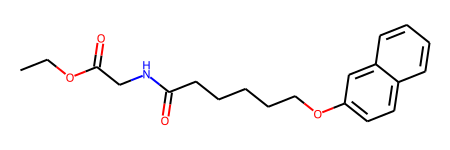

In [39]:
mMols[1]

In [43]:
Chem.Lipinsky.NumHDonors(mMols[1])

AttributeError: module 'rdkit.Chem' has no attribute 'Lipinsky'